# Assignment-4: Support Vector Machine (SVM)

**Objective:** Demonstrate SVM classification using an appropriate dataset and visualize results.

---

## Q1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Libraries imported')

Libraries imported


## Q2: Load Dataset

In [2]:
import pandas as pd

df_heart = pd.read_csv('/content/Dataset_heart.csv')
display(df_heart.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


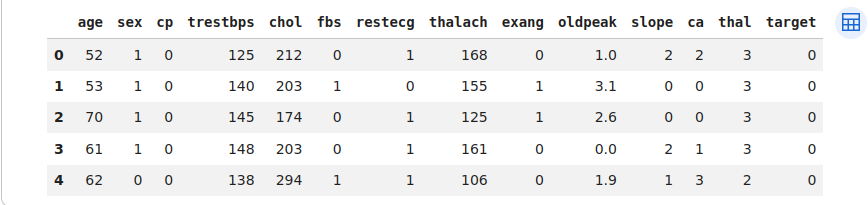

## Q3: Explore Dataset

In [3]:
print('Shape:', df_heart.shape)
print('Classes:', df_heart['target'].unique())
df_heart.describe()

Shape: (1025, 14)
Classes: [0 1]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


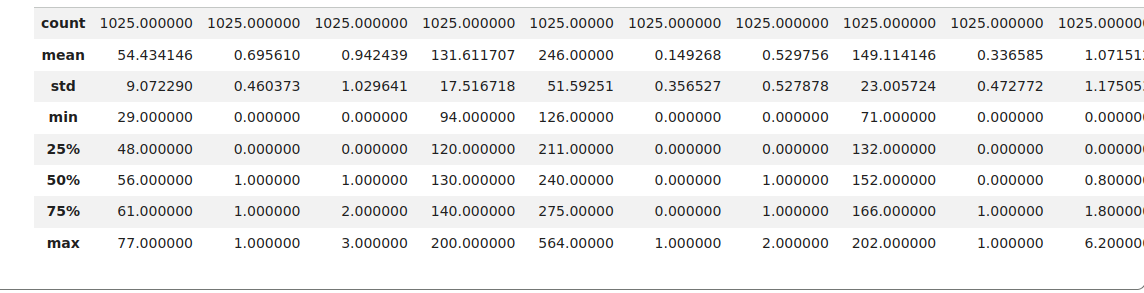

## Q4: Select Features (two for visualization)

In [4]:
X = df_heart[['age', 'trestbps']] # Selecting two features for visualization
y = df_heart['target']
X.head()

,age,trestbps
0,52,125
1,53,140
2,70,145
3,61,148
4,62,138


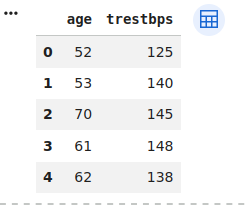

## Q5: Train–Test Split (70:30)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print('Training size:', X_train.shape)
print('Testing size:', X_test.shape)

Training size: (717, 2)
Testing size: (308, 2)


## Q6: Build SVM Model (Linear Kernel)

In [6]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
print('Model trained')

Model trained


## Q7: Predict Test Data

In [7]:
y_pred = svm.predict(X_test)
list(y_pred)[:10]

[np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0)]

## Q8: Compare Predictions (Correct / Wrong)

In [8]:
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
results['Status'] = results.apply(lambda r: 'Correct' if r.Actual == r.Predicted else 'Wrong', axis=1)
results.head(20)

,Actual,Predicted,Status
0,1,0,Wrong
1,1,1,Correct
2,0,0,Correct
3,1,1,Correct
4,0,1,Wrong
5,1,0,Wrong
6,0,0,Correct
7,0,0,Correct
8,1,1,Correct
9,0,0,Correct


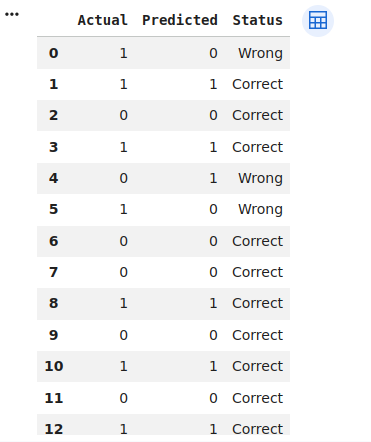

## Q9: Evaluate Model Performance

In [9]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.6136363636363636

Confusion Matrix:
 [[100  59]
 [ 60  89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.63      0.63       159
           1       0.60      0.60      0.60       149

    accuracy                           0.61       308
   macro avg       0.61      0.61      0.61       308
weighted avg       0.61      0.61      0.61       308



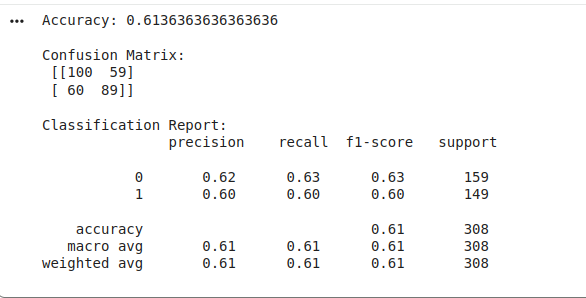

## Q10: Visualize Decision Boundary

In [ ]:
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.25, cmap='coolwarm')
plt.scatter(
    X.iloc[:, 0],
    X.iloc[:, 1],
    c=y,              # assuming y contains class labels
    cmap='coolwarm',
    edgecolors='k'
)

plt.xlabel('Age')  # this is now a valid comment
plt.ylabel('Resting Blood Pressure')
plt.title('SVM Decision Boundary & Margins')
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


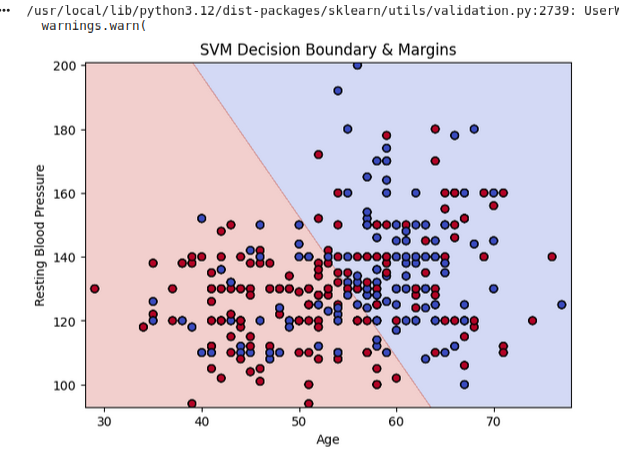

---
###
 Conclusion:

This SVM classification experiment on the Heart Disease dataset, using 'age' and 'trestbps' as features, yielded an overall accuracy of approximately 61.36%. The model's performance, as indicated by the confusion matrix and classification report, showed balanced precision and recall for both classes. However, the moderate accuracy suggests that these two features alone might not be sufficient for robust prediction, indicating potential for improvement with more features or different model configurations.